<div class="aside">
    <center><h1>NLP Pipeline, Word Embeddings, Neural Nets & more</h1>
        <h2>Twitter Sentiment Analysis Project</h2>
            <br>
                <p>Welcome to this Kaggle notebook focusing on NLP Pipeline. We're having a lot to discuss starting from fundamentals of NLP, Text prepocessing techniques, word embedding and different neural networks. We're also going to use Twitter data! In this notebook, we will explore the fascinating world of Natural Language Processing (NLP) by analyzing the sentiment expressed in tweets.
                </p>
            <br>
        <img src = 'https://raw.githubusercontent.com/AshishJangra27/nlp-support/main/NLP%20Intro.png', width = 100%>
    </center>
    
<h2>Objective</h2>
    <p>Our main objective is to develop machine learning model that can accurately classify tweets as either positive, negative, or neutral based on their content. Sentiment analysis has a wide range of applications, from understanding public opinion to brand monitoring and beyond. We'll try to perform different <b>EDA, Data Preprocessing, Encoding, Embedding</b> and <b>Neural Network Techniques</b> to execute the project.</p>
    
<h2>Dataset</h2>
    <p>We will be using a dataset containing tweets collected from Twitter. The dataset includes text, as well as labels indicating the sentiment associated with each tweet. The labels could be 'positive', 'negative'. Positive denoted by 4 and negative by 0. This dataset is having around <b>1.6 Million Tweets</b>. The dataset is perfetly balanced i.e it has 800k tweets with positive and 800k tweets of negative sentiments.</p>
    
<h2>Notebook Structure</h2>
    <p>This notebook is structured as follows:</p>

 <h4>1. Exploratory Data Analysis</h4>
  <h4>1.1) Loading the dataset</h4>
  <h5>1.2) Data cleaning</h5> 
  <h5>1.3) Label distribution</h5>
  <h5>1.4) Creating Word Cloud</h5>
  <h5>1.5) Creating word length distribution</h5>
    
 <h4>2. Data Preparation for Model Building</h4>
  <h5>2.1) Loading the Dataset</h5>
  <h5>2.2) Data cleaning</h5>
    
 <h4>3. Trying different Neural Networks</h4>
  <h5>3.1) Splitting dataset into training/testing and         validation</h5>
  <h5>3.2) One Hot Encoding + model training</h5>       <h5>3.3) Count Vectoriser + model training</h5>       <h5>3.4) TF-IDF + model training</h5>       
  <h5>3.5) ANN with Text Sequences</h5>
  <h6>3.5.1) Loading the dataset</h6>
  <h6>3.5.2) Cleaning the dataset</h6>
  <h6>3.5.3) Text encoding</h6>
  <h6>3.5.4) Training the model</h6>
  <h5>3.6) ANN + Embedding with Text Sequences  </h5>
  <h5>3.7) LSTM + Embedding with Text Sequences</h5>
  <h5>3.8) GRU + Embedding with Text Sequencess</h5>
  <h5>3.9) Bidirectional + GRU + Embedding with Text            Sequences</h5>
  <h5>3.10) Bidirectional + LSTM + Embedding with Text          Sequences</h5>
  <h5>3.11) Convolution+ Embedding with Text Sequences</h5>
   
  
 <h4>4. Neural Nets with Custom Word2Vec</h4>
  <h5>4.1) Custom Word2Vec in Cov1D</h5>
    <h6>4.1.1) Loading the dataset</h6>
  <h6>4.1.2) Training the Word2Vec</h6>
  <h6>4.1.3) Creating Embedding Matrix</h6>
  <h6>4.1.4) Training the Neural Network</h6>
  <h5>4.2) Custom Word2Vec with Bidirectional +               LSTM</h5>

    
    
</div>

### **- Importing Libraries**

In [1]:
import os
import re
import nltk
import spacy

import numpy as np
import pandas as pd
from tqdm import tqdm
from wordcloud import WordCloud

import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.figure_factory as ff
from plotly.subplots import make_subplots

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

from gensim.models import Word2Vec

from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.utils import pad_sequences
from keras.utils import to_categorical

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Flatten, Dropout, Embedding, GlobalMaxPooling1D, Conv1D, SimpleRNN, LSTM, GRU, Bidirectional


import warnings
warnings.filterwarnings('ignore')

nltk.download('punkt')
nltk.download('stopwords')

nlp = spacy.load("en_core_web_sm")

stop_words = set(stopwords.words('english'))
stop_words = [i for i in stop_words if i not in ['not','until','against','up', 'down', 'no', 'nor',"aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',
                                                "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 
                                                 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't", "don't"]] 

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### **1) Exploratory Data Anlaysis**
#### **1.1) Loading the Dataset**

In [2]:
df = pd.read_csv('/kaggle/input/sentiment140/training.1600000.processed.noemoticon.csv', encoding = "latin", header = None, on_bad_lines='skip')

df.rename(columns={0: 'labels', 5: 'tweets'}, inplace=True)
df.drop([1,2,3,4], axis=1, inplace = True)

df['labels'] = df['labels'].replace(4,1)

df = df.sample(frac=1)
df = df.head(10000)
df.head()

,labels,tweets
1323104,1,@DitaVonTeese have you seen it yet? I am sure ...
298027,0,EHHHHH Bed early tonight class at umd tmw
140644,0,@alilfatmonkey aircond shut off 30 minutes ago...
1308667,1,"'Mothers, Others, and Jonas Brothers' - hahaha..."
701182,0,TweetDeck for iPhone is indeed very cool but I...


#### **1.2) Data Cleaning**

<center><img src = 'https://raw.githubusercontent.com/AshishJangra27/nlp-support/main/Text%20Cleaning.png'></center>

In [3]:
def get_word_len(tweet):
    return len(tweet.split(' '))

def get_char_len(tweet):
    return len(tweet)

def preprocess_tweet(tweet):
    tweet = tweet.lower()
    tweet = re.sub(r"http\S+|www\S+|https\S+", '', tweet, flags=re.MULTILINE)
    tweet = re.sub(r'@\w+', '', tweet)
    tweet = re.sub(r'[^\w\s#]', '', tweet)
    tokens = [token.lemma_ for token in nlp(tweet)]
    tokens = [token for token in tokens if token not in stop_words]
    tokens = [token for token in tokens if len(token) > 1]
    processed_tweet = ' '.join(tokens)
    return processed_tweet

df['clean_tweets'] = [preprocess_tweet(tw) for tw in tqdm(df['tweets'] ,position=0, leave=True )]
df['tweet_words_length'] = df['clean_tweets'].apply(get_word_len)
df['tweet_chars_length'] = df['clean_tweets'].apply(get_char_len)

df.head()

100%|██████████| 10000/10000 [01:38<00:00, 101.10it/s]


,labels,tweets,clean_tweets,tweet_words_length,tweet_chars_length
1323104,1,@DitaVonTeese have you seen it yet? I am sure ...,see yet sure fine,4,17
298027,0,EHHHHH Bed early tonight class at umd tmw,ehhhhh bed early tonight class umd tmw,7,38
140644,0,@alilfatmonkey aircond shut off 30 minutes ago...,aircond shut 30 minute ago still da office,8,42
1308667,1,"'Mothers, Others, and Jonas Brothers' - hahaha...",mother jonas brother hahahah love demz,6,38
701182,0,TweetDeck for iPhone is indeed very cool but I...,tweetdeck iphone indeed cool guess get old cau...,14,78


#### **1.3) Label Distribution**

In [4]:
positive_count = df[df['labels'] == 1].shape[0]
negative_count = df[df['labels'] == 0].shape[0]

fig = px.pie(values=[df[df['labels'] == 1].shape[0], negative_count], title='Distribution of Positive and Negative Tweets' , 
             names= ['Negative', 'Positive'], hover_name = ['Negative', 'Positive'] , opacity = .9, template = 'simple_white')

fig.show()

#### **1.4) Creating Word Cloud**

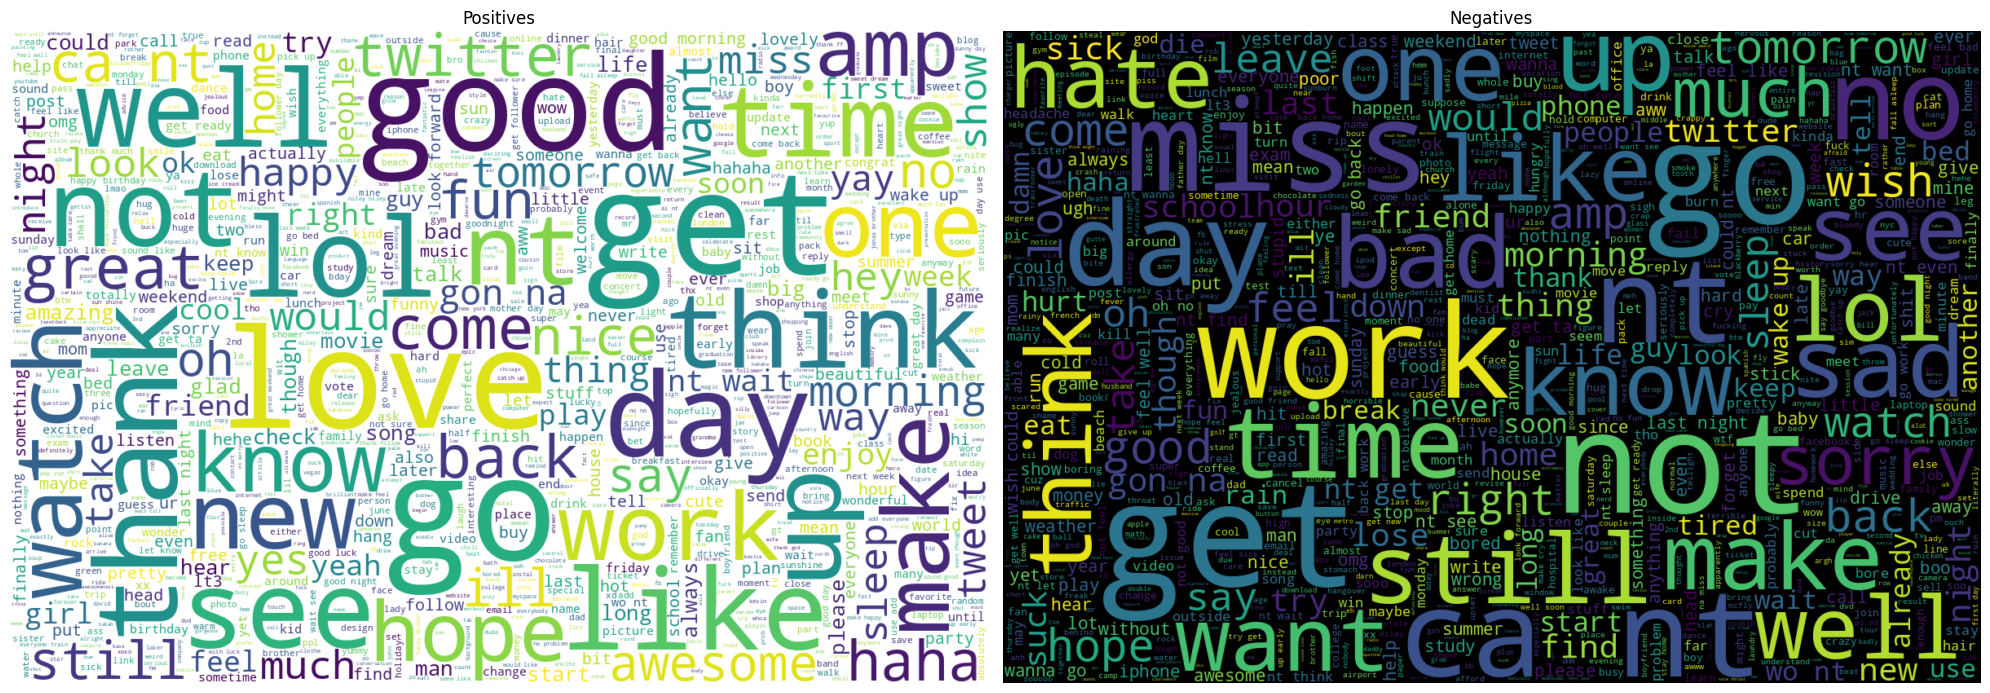

In [5]:
plt.figure(figsize=(20, 8))

STOPWORDS = ['im','today','really','need','tonight']

plt.subplot(1, 2, 1)
wordcloud_1 = WordCloud( width = 1200,  height = 800,  max_words = 1000, contour_width = 2, background_color='white', stopwords = STOPWORDS,max_font_size = 180,
                colormap='viridis').generate(' '.join(df[df['labels'] == 1]['clean_tweets']))
plt.imshow(wordcloud_1, interpolation='bilinear')
plt.axis('off')
plt.title('Positives')


plt.subplot(1, 2, 2)
wordcloud_2 = WordCloud( width = 1200, height = 800, max_words = 1000, contour_width = 2, background_color='black', stopwords = STOPWORDS, max_font_size = 180,
                colormap='viridis').generate(' '.join(df[df['labels'] == 0]['clean_tweets']))
plt.imshow(wordcloud_2, interpolation='bilinear')
plt.axis('off')
plt.title('Negatives')

plt.axis('off')
plt.tight_layout()
plt.show()

#### **1.5) Creating Word Length Distribution**

In [6]:
fig_words = ff.create_distplot([df[df['labels'] == 1]['tweet_words_length'], df[df['labels'] == 0]['tweet_words_length']],
                               ['Positive', 'Negative'], bin_size = 25, show_hist=False, show_rug=False)
fig_chars = ff.create_distplot([df[df['labels'] == 1]['tweet_chars_length'], df[df['labels'] == 0]['tweet_chars_length']],
                               ['Positive', 'Negative'], bin_size = 25, show_hist=False, show_rug=False)


fig_chars.update_layout(title="Distribution Plot on Character Count", xaxis_title="Number of Characters", yaxis_title="Frequency")
fig_words.update_layout(title="Distribution Plot on Word Count", xaxis_title="Number of Words", yaxis_title="Frequency")

# Combine the plots in a 2-column layout
fig = make_subplots(rows=1, cols=2, subplot_titles=["Word Count", "Character Count"])
fig.add_trace(fig_words['data'][0], row=1, col=1)
fig.add_trace(fig_words['data'][1], row=1, col=1)
fig.add_trace(fig_chars['data'][0], row=1, col=2)
fig.add_trace(fig_chars['data'][1], row=1, col=2)

# Update overall layout and show the plot
fig.update_layout(title_text="Distribution Plots - Word Count vs Character Count", showlegend = True , font=dict(family="Arial", size=15, color="black"))
fig.show()

### **2) Data Preparation for Model Building**
#### **2.1) Loading the Dataset**

In [7]:
df = pd.read_csv('/kaggle/input/sentiment140/training.1600000.processed.noemoticon.csv', encoding = "latin", header = None, on_bad_lines='skip')

df.rename(columns={0: 'labels', 5: 'tweets'}, inplace=True)
df.drop([1,2,3,4], axis=1, inplace = True)

df['labels'] = df['labels'].replace(4,1)

df = df.sample(frac=1)
df = df.head(10000)

#### **2.2) Data Cleaning**

In [8]:
df['clean_tweets'] = [preprocess_tweet(tw) for tw in tqdm(df['tweets'] ,position=0, leave=True )]
df['tweet_words_length'] = df['clean_tweets'].apply(get_word_len)
df['tweet_chars_length'] = df['clean_tweets'].apply(get_char_len)

df.head()

100%|██████████| 10000/10000 [01:38<00:00, 101.56it/s]


,labels,tweets,clean_tweets,tweet_words_length,tweet_chars_length
1107941,1,@TashaDeidre LOL! I sure did. U been doing o...,lol sure ok boy kobe get win last night feel l...,14,63
1595853,1,cant wait til thursday when i see my beautiful...,ca nt wait til thursday see beautiful lady amp...,20,104
723790,0,is frustrated that facebook kicked her off for...,frustrate facebook kick abuse privelege even t...,10,69
1153951,1,cant wait till tonight for the MTV awards!!,ca nt wait till tonight mtv award,7,33
23427,0,@Beverleyknight sorry 2 hear u feel under the ...,sorry hear feel weather could please follow br...,11,66


### **3) Trying different Neural Networks**
#### **3.1) Splitting Dataset into Training/Testing and Validation**

In [9]:
epochs_ = 10
seq_len = 20
batch_size_ = 64
training_size = .8
embedding_len = 100

x_train, x_test, y_train, y_test = train_test_split(df['clean_tweets'], df['labels'], test_size=0.2, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=0.5)

fig = px.pie(values=[len(x_train), len(x_test), len(x_val)], title='Distribution of Training,Testing and Validation Tweets' , 
             names= ['Training', 'Testing','Validation'], hover_name = ['Training', 'Testing','Validation'] , opacity = .9, template = 'simple_white')
fig.show()

#### **3.2) One Hot Encoded + Model Training**


<center> <img src = 'https://raw.githubusercontent.com/AshishJangra27/nlp-support/main/One%20Hot%20Encoding.png'></center>

In [10]:
vec = CountVectorizer(binary = True)
vec = vec.fit(df['clean_tweets'])

enc_tweets = vec.transform(df['clean_tweets']).toarray()

x_train, x_test, y_train, y_test = train_test_split(enc_tweets, df['labels'], test_size = training_size, random_state = 42)
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=0.5)

model = Sequential()
model.add(Dense(2048, activation='relu', input_shape=(enc_tweets.shape[1],)))
model.add(Dense(512, activation='relu'))
model.add(Dropout(.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(.5))
model.add(Dense(32, activation='relu'))
model.add(Dropout(.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer = Adam(learning_rate = 0.0001), metrics=['accuracy'])

history_1 = model.fit(x_train, y_train, epochs = epochs_, batch_size = batch_size_, validation_data=(x_val, y_val))
print('\n')
print("Model Evaluation on Testing Data : ", round(model.evaluate(x_test,y_test)[1]*100,2))

Epoch 1/10
32/32 [==============================] - 16s 451ms/step - loss: 0.6936 - accuracy: 0.5085 - val_loss: 0.6926 - val_accuracy: 0.5335
Epoch 2/10
32/32 [==============================] - 13s 418ms/step - loss: 0.6902 - accuracy: 0.5530 - val_loss: 0.6906 - val_accuracy: 0.5903
Epoch 3/10
32/32 [==============================] - 14s 433ms/step - loss: 0.6833 - accuracy: 0.5970 - val_loss: 0.6852 - val_accuracy: 0.6192
Epoch 4/10
32/32 [==============================] - 13s 420ms/step - loss: 0.6661 - accuracy: 0.6810 - val_loss: 0.6706 - val_accuracy: 0.6605
Epoch 5/10
32/32 [==============================] - 14s 434ms/step - loss: 0.6259 - accuracy: 0.7420 - val_loss: 0.6373 - val_accuracy: 0.6845
Epoch 6/10
32/32 [==============================] - 13s 420ms/step - loss: 0.5287 - accuracy: 0.8315 - val_loss: 0.5928 - val_accuracy: 0.7023
Epoch 7/10
32/32 [==============================] - 14s 433ms/step - loss: 0.3799 - accuracy: 0.9000 - val_loss: 0.5889 - val_accuracy: 0.6965

#### **3.3) Count Vectorizer + Model Training**

<center> <img src = 'https://raw.githubusercontent.com/AshishJangra27/nlp-support/main/Count%20Vectorizer.png'></center>

In [11]:
vec = CountVectorizer(binary = False)
vec = vec.fit(df['clean_tweets'])

enc_tweets = vec.transform(df['clean_tweets']).toarray()

x_train, x_test, y_train, y_test = train_test_split(enc_tweets, df['labels'], test_size = training_size, random_state = 42)
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=0.5)

model = Sequential()
model.add(Dense(2048, activation='relu', input_shape=(enc_tweets.shape[1],)))
model.add(Dense(512, activation='relu'))
model.add(Dropout(.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(.5))
model.add(Dense(32, activation='relu'))
model.add(Dropout(.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer = Adam(learning_rate = 0.0001), metrics=['accuracy'])

history_2 = model.fit(x_train, y_train, epochs = epochs_, batch_size = batch_size_, validation_data=(x_val, y_val))
print('\n')
print("Model Evaluation on Testing Data : ", round(model.evaluate(x_test,y_test)[1]*100,2))

Epoch 1/10
32/32 [==============================] - 16s 450ms/step - loss: 0.6929 - accuracy: 0.5075 - val_loss: 0.6916 - val_accuracy: 0.5928
Epoch 2/10
32/32 [==============================] - 13s 420ms/step - loss: 0.6880 - accuracy: 0.5805 - val_loss: 0.6883 - val_accuracy: 0.6348
Epoch 3/10
32/32 [==============================] - 13s 419ms/step - loss: 0.6797 - accuracy: 0.6145 - val_loss: 0.6807 - val_accuracy: 0.6622
Epoch 4/10
32/32 [==============================] - 14s 430ms/step - loss: 0.6635 - accuracy: 0.6750 - val_loss: 0.6663 - val_accuracy: 0.6727
Epoch 5/10
32/32 [==============================] - 13s 421ms/step - loss: 0.6180 - accuracy: 0.7550 - val_loss: 0.6351 - val_accuracy: 0.6890
Epoch 6/10
32/32 [==============================] - 14s 433ms/step - loss: 0.5316 - accuracy: 0.8230 - val_loss: 0.5940 - val_accuracy: 0.6898
Epoch 7/10
32/32 [==============================] - 13s 423ms/step - loss: 0.3884 - accuracy: 0.8950 - val_loss: 0.5819 - val_accuracy: 0.6935

#### **3.4) TF-IDF + Model Training**


<center> <img src = 'https://raw.githubusercontent.com/AshishJangra27/nlp-support/main/TF-IDF.png'></center>


In [12]:
tfidf = TfidfVectorizer()
enc_tweets = tfidf.fit_transform(df['clean_tweets']).toarray()

x_train, x_test, y_train, y_test = train_test_split(enc_tweets, df['labels'], test_size = training_size, random_state = 42)
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=0.5)

model = Sequential()
model.add(Dense(2048, activation='relu', input_shape=(enc_tweets.shape[1],)))
model.add(Dense(512, activation='relu'))
model.add(Dropout(.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(.5))
model.add(Dense(32, activation='relu'))
model.add(Dropout(.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer = Adam(learning_rate = 0.0001), metrics=['accuracy'])

history_3 = model.fit(x_train, y_train, epochs = epochs_, batch_size = batch_size_, validation_data=(x_val, y_val))
print('\n')
print("Model Evaluation on Testing Data : ", round(model.evaluate(x_test,y_test)[1]*100,2))

Epoch 1/10
32/32 [==============================] - 15s 437ms/step - loss: 0.6930 - accuracy: 0.5160 - val_loss: 0.6926 - val_accuracy: 0.5110
Epoch 2/10
32/32 [==============================] - 14s 427ms/step - loss: 0.6919 - accuracy: 0.5325 - val_loss: 0.6918 - val_accuracy: 0.5230
Epoch 3/10
32/32 [==============================] - 13s 416ms/step - loss: 0.6889 - accuracy: 0.5860 - val_loss: 0.6893 - val_accuracy: 0.5698
Epoch 4/10
32/32 [==============================] - 13s 414ms/step - loss: 0.6806 - accuracy: 0.6590 - val_loss: 0.6821 - val_accuracy: 0.6845
Epoch 5/10
32/32 [==============================] - 14s 432ms/step - loss: 0.6537 - accuracy: 0.7470 - val_loss: 0.6620 - val_accuracy: 0.6888
Epoch 6/10
32/32 [==============================] - 13s 415ms/step - loss: 0.5818 - accuracy: 0.8270 - val_loss: 0.6165 - val_accuracy: 0.6948
Epoch 7/10
32/32 [==============================] - 14s 429ms/step - loss: 0.4258 - accuracy: 0.9145 - val_loss: 0.5758 - val_accuracy: 0.6945

#### **3.5) ANN with Text Sequencess**

<center> <img src = 'https://raw.githubusercontent.com/AshishJangra27/nlp-support/main/Index%20based%20Encoding.png'></center>

##### **3.5.1) Loading the Dataset**

In [13]:
epochs_ = 10
seq_len = 20
batch_size_ = 64
training_size = .8
embedding_len = 100

df = pd.read_csv('/kaggle/input/sentiment140/training.1600000.processed.noemoticon.csv', encoding = "latin", header = None, on_bad_lines='skip')

df.rename(columns={0: 'labels', 5: 'tweets'}, inplace=True)
df.drop([1,2,3,4], axis=1, inplace = True)

df['labels'] = df['labels'].replace(4,1)

df = df.sample(frac=1)
df = df.head(20000)

##### **3.5.2) Cleaning the Dataset**

In [14]:
df['clean_tweets'] = [preprocess_tweet(tw) for tw in tqdm(df['tweets'] ,position=0, leave=True )]
df['tweet_words_length'] = df['clean_tweets'].apply(get_word_len)
df['tweet_chars_length'] = df['clean_tweets'].apply(get_char_len)

100%|██████████| 20000/20000 [03:16<00:00, 101.81it/s]


##### **3.5.3) Text Encoding**

In [15]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['clean_tweets'])

word_index = tokenizer.word_index
index_word = tokenizer.index_word

sequences = tokenizer.texts_to_sequences(df['clean_tweets'])
enc_tweets = pad_sequences(sequences, maxlen = seq_len, padding = 'post')

x_train, x_test, y_train, y_test = train_test_split(enc_tweets, df['labels'], test_size = training_size, random_state = 42)
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=0.5)

##### **3.5.4) Training the Model**

In [16]:
model = Sequential()

model.add(Dense(64, activation='relu', input_shape=(seq_len,)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer = Adam(learning_rate = 0.0001), metrics=['accuracy'])

history_4 = model.fit(x_train, y_train, epochs = epochs_, batch_size = batch_size_, validation_data=(x_val, y_val))
print('\n')
print("Model Evaluation on Testing Data : ", round(model.evaluate(x_test,y_test)[1]*100,2))

Epoch 1/10
63/63 [==============================] - 1s 10ms/step - loss: 193.4578 - accuracy: 0.4995 - val_loss: 160.5110 - val_accuracy: 0.5064
Epoch 2/10
63/63 [==============================] - 0s 5ms/step - loss: 127.1540 - accuracy: 0.5065 - val_loss: 120.8659 - val_accuracy: 0.4995
Epoch 3/10
63/63 [==============================] - 0s 5ms/step - loss: 97.0339 - accuracy: 0.5013 - val_loss: 100.4741 - val_accuracy: 0.4992
Epoch 4/10
63/63 [==============================] - 0s 5ms/step - loss: 81.2566 - accuracy: 0.5058 - val_loss: 88.8244 - val_accuracy: 0.4970
Epoch 5/10
63/63 [==============================] - 0s 7ms/step - loss: 70.8842 - accuracy: 0.5065 - val_loss: 80.3134 - val_accuracy: 0.4958
Epoch 6/10
63/63 [==============================] - 0s 5ms/step - loss: 63.5223 - accuracy: 0.5082 - val_loss: 74.1143 - val_accuracy: 0.4960
Epoch 7/10
63/63 [==============================] - 0s 5ms/step - loss: 58.7270 - accuracy: 0.5182 - val_loss: 69.6203 - val_accuracy: 0.4959


#### **3.6) ANN + Embedding with Text Sequencess**

<center> <img src = 'https://raw.githubusercontent.com/AshishJangra27/nlp-support/main/Word%20Embedding.png'></center>

In [17]:
model = Sequential()

model.add(Embedding(input_dim = len(word_index) + 1, output_dim = embedding_len, input_length = seq_len))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer = Adam(learning_rate = 0.0001), metrics=['accuracy'])

history_5 = model.fit(x_train, y_train, epochs = epochs_, batch_size = batch_size_, validation_data=(x_val, y_val))
print('\n')
print("Model Evaluation on Testing Data : ", round(model.evaluate(x_test,y_test)[1]*100,2))

Epoch 1/10
63/63 [==============================] - 2s 24ms/step - loss: 0.6929 - accuracy: 0.5167 - val_loss: 0.6924 - val_accuracy: 0.5430
Epoch 2/10
63/63 [==============================] - 1s 23ms/step - loss: 0.6900 - accuracy: 0.5648 - val_loss: 0.6911 - val_accuracy: 0.5210
Epoch 3/10
63/63 [==============================] - 1s 21ms/step - loss: 0.6832 - accuracy: 0.6432 - val_loss: 0.6871 - val_accuracy: 0.5950
Epoch 4/10
63/63 [==============================] - 1s 21ms/step - loss: 0.6678 - accuracy: 0.7510 - val_loss: 0.6785 - val_accuracy: 0.5878
Epoch 5/10
63/63 [==============================] - 1s 24ms/step - loss: 0.6339 - accuracy: 0.8030 - val_loss: 0.6576 - val_accuracy: 0.6531
Epoch 6/10
63/63 [==============================] - 2s 26ms/step - loss: 0.5680 - accuracy: 0.8590 - val_loss: 0.6298 - val_accuracy: 0.6656
Epoch 7/10
63/63 [==============================] - 1s 22ms/step - loss: 0.4752 - accuracy: 0.8845 - val_loss: 0.6034 - val_accuracy: 0.6745
Epoch 8/10
63

#### **3.7) LSTM + Embedding with Text Sequencess**

In [18]:
model = Sequential()

model.add(Embedding(input_dim = len(word_index) + 1, output_dim = embedding_len, input_length = seq_len))
model.add(LSTM(units=128, dropout=0.2, return_sequences=True))
model.add(LSTM(64))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))


model.compile(loss='binary_crossentropy', optimizer = Adam(learning_rate = 0.0001), metrics=['accuracy'])

history_6 = model.fit(x_train, y_train, epochs = epochs_, batch_size = batch_size_, validation_data=(x_val, y_val))
print('\n')
print("Model Evaluation on Testing Data : ", round(model.evaluate(x_test,y_test)[1]*100,2))

# model.save('Embedding_LSTM.h5')

Epoch 1/10
63/63 [==============================] - 13s 119ms/step - loss: 0.6933 - accuracy: 0.4992 - val_loss: 0.6930 - val_accuracy: 0.5627
Epoch 2/10
63/63 [==============================] - 7s 107ms/step - loss: 0.6929 - accuracy: 0.5180 - val_loss: 0.6928 - val_accuracy: 0.5013
Epoch 3/10
63/63 [==============================] - 7s 110ms/step - loss: 0.6912 - accuracy: 0.5405 - val_loss: 0.6884 - val_accuracy: 0.5871
Epoch 4/10
63/63 [==============================] - 7s 108ms/step - loss: 0.6271 - accuracy: 0.6992 - val_loss: 0.5933 - val_accuracy: 0.6862
Epoch 5/10
63/63 [==============================] - 7s 109ms/step - loss: 0.4600 - accuracy: 0.7987 - val_loss: 0.5849 - val_accuracy: 0.7010
Epoch 6/10
63/63 [==============================] - 7s 104ms/step - loss: 0.3669 - accuracy: 0.8508 - val_loss: 0.6053 - val_accuracy: 0.7023
Epoch 7/10
63/63 [==============================] - 7s 107ms/step - loss: 0.3041 - accuracy: 0.8827 - val_loss: 0.6553 - val_accuracy: 0.7032
Epoch

#### **3.8) GRU + Embedding with Text Sequencess**

In [19]:
model = Sequential()

model.add(Embedding(input_dim = len(word_index) + 1, output_dim = embedding_len, input_length = seq_len))
model.add(GRU(128, dropout=0.2, return_sequences=True))
model.add(GRU(64))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))


model.compile(loss='binary_crossentropy', optimizer = Adam(learning_rate = 0.0001), metrics=['accuracy'])

history_7 = model.fit(x_train, y_train, epochs = epochs_, batch_size = batch_size_, validation_data=(x_val, y_val))
print('\n')
print("Model Evaluation on Testing Data : ", round(model.evaluate(x_test,y_test)[1]*100,2))

Epoch 1/10
63/63 [==============================] - 12s 106ms/step - loss: 0.6933 - accuracy: 0.4988 - val_loss: 0.6932 - val_accuracy: 0.5013
Epoch 2/10
63/63 [==============================] - 6s 91ms/step - loss: 0.6931 - accuracy: 0.5073 - val_loss: 0.6932 - val_accuracy: 0.5013
Epoch 3/10
63/63 [==============================] - 6s 91ms/step - loss: 0.6932 - accuracy: 0.5075 - val_loss: 0.6932 - val_accuracy: 0.5013
Epoch 4/10
63/63 [==============================] - 6s 94ms/step - loss: 0.6932 - accuracy: 0.5098 - val_loss: 0.6932 - val_accuracy: 0.5013
Epoch 5/10
63/63 [==============================] - 6s 100ms/step - loss: 0.6930 - accuracy: 0.5082 - val_loss: 0.6931 - val_accuracy: 0.5013
Epoch 6/10
63/63 [==============================] - 6s 90ms/step - loss: 0.6930 - accuracy: 0.5090 - val_loss: 0.6931 - val_accuracy: 0.5013
Epoch 7/10
63/63 [==============================] - 6s 92ms/step - loss: 0.6927 - accuracy: 0.5125 - val_loss: 0.6930 - val_accuracy: 0.5013
Epoch 8/10

#### **3.9) Bidirectional + GRU + Embedding with Text Sequencess**

In [20]:
model = Sequential()

model.add(Embedding(input_dim = len(word_index) + 1, output_dim = embedding_len, input_length = seq_len))
model.add(Bidirectional(GRU(128, return_sequences=True)))
model.add(Bidirectional(GRU(64)))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer = Adam(learning_rate = 0.0001), metrics=['accuracy'])

history_8 = model.fit(x_train, y_train, epochs = epochs_, batch_size = batch_size_, validation_data=(x_val, y_val))
print('\n')
print("Model Evaluation on Testing Data : ", round(model.evaluate(x_test,y_test)[1]*100,2))

Epoch 1/10
63/63 [==============================] - 20s 164ms/step - loss: 0.6926 - accuracy: 0.5210 - val_loss: 0.6919 - val_accuracy: 0.5425
Epoch 2/10
63/63 [==============================] - 9s 145ms/step - loss: 0.6899 - accuracy: 0.5435 - val_loss: 0.6883 - val_accuracy: 0.5770
Epoch 3/10
63/63 [==============================] - 9s 141ms/step - loss: 0.6771 - accuracy: 0.6177 - val_loss: 0.6685 - val_accuracy: 0.6488
Epoch 4/10
63/63 [==============================] - 9s 138ms/step - loss: 0.5861 - accuracy: 0.7588 - val_loss: 0.5815 - val_accuracy: 0.6933
Epoch 5/10
63/63 [==============================] - 9s 140ms/step - loss: 0.4030 - accuracy: 0.8310 - val_loss: 0.5958 - val_accuracy: 0.7066
Epoch 6/10
63/63 [==============================] - 9s 146ms/step - loss: 0.2919 - accuracy: 0.8888 - val_loss: 0.6698 - val_accuracy: 0.7009
Epoch 7/10
63/63 [==============================] - 9s 139ms/step - loss: 0.2178 - accuracy: 0.9187 - val_loss: 0.7872 - val_accuracy: 0.6821
Epoch

#### **3.10) Bidirectional + LSTM + Embedding with Text Sequencess**

In [21]:
model = Sequential()

model.add(Embedding(input_dim = len(word_index) + 1, output_dim = embedding_len, input_length = seq_len))
model.add(Bidirectional(LSTM(128, return_sequences=True)))
model.add(Bidirectional(LSTM(64)))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))


model.compile(loss='binary_crossentropy', optimizer = Adam(learning_rate = 0.0001), metrics=['accuracy'])

history_9 = model.fit(x_train, y_train, epochs = epochs_, batch_size = batch_size_, validation_data=(x_val, y_val))
print('\n')
print("Model Evaluation on Testing Data : ", round(model.evaluate(x_test,y_test)[1]*100,2))

Epoch 1/10
63/63 [==============================] - 21s 186ms/step - loss: 0.6929 - accuracy: 0.5052 - val_loss: 0.6927 - val_accuracy: 0.5433
Epoch 2/10
63/63 [==============================] - 10s 153ms/step - loss: 0.6926 - accuracy: 0.5188 - val_loss: 0.6916 - val_accuracy: 0.5629
Epoch 3/10
63/63 [==============================] - 11s 182ms/step - loss: 0.6883 - accuracy: 0.5690 - val_loss: 0.6838 - val_accuracy: 0.6090
Epoch 4/10
63/63 [==============================] - 10s 153ms/step - loss: 0.5951 - accuracy: 0.7260 - val_loss: 0.6181 - val_accuracy: 0.6924
Epoch 5/10
63/63 [==============================] - 9s 150ms/step - loss: 0.3977 - accuracy: 0.8313 - val_loss: 0.6135 - val_accuracy: 0.7060
Epoch 6/10
63/63 [==============================] - 10s 157ms/step - loss: 0.3038 - accuracy: 0.8863 - val_loss: 0.6618 - val_accuracy: 0.7050
Epoch 7/10
63/63 [==============================] - 10s 159ms/step - loss: 0.2359 - accuracy: 0.9190 - val_loss: 0.7082 - val_accuracy: 0.6990


#### **3.11) Convolution + Embedding with Text Sequencess**

In [22]:
model = Sequential()

model.add(Embedding(input_dim = len(word_index) + 1, output_dim = embedding_len, input_length = seq_len))
model.add(Conv1D(128, 5, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer = Adam(learning_rate = 0.0001), metrics=['accuracy'])

history_10 = model.fit(x_train, y_train, epochs = epochs_, batch_size = batch_size_, validation_data=(x_val, y_val))
print('\n')
print("Model Evaluation on Testing Data : ", round(model.evaluate(x_test,y_test)[1]*100,2))

Epoch 1/10
63/63 [==============================] - 3s 31ms/step - loss: 0.6927 - accuracy: 0.5142 - val_loss: 0.6920 - val_accuracy: 0.5126
Epoch 2/10
63/63 [==============================] - 2s 27ms/step - loss: 0.6894 - accuracy: 0.5393 - val_loss: 0.6904 - val_accuracy: 0.5429
Epoch 3/10
63/63 [==============================] - 2s 29ms/step - loss: 0.6852 - accuracy: 0.5640 - val_loss: 0.6880 - val_accuracy: 0.5562
Epoch 4/10
63/63 [==============================] - 2s 30ms/step - loss: 0.6764 - accuracy: 0.6440 - val_loss: 0.6834 - val_accuracy: 0.5871
Epoch 5/10
63/63 [==============================] - 2s 31ms/step - loss: 0.6615 - accuracy: 0.7035 - val_loss: 0.6734 - val_accuracy: 0.6294
Epoch 6/10
63/63 [==============================] - 2s 33ms/step - loss: 0.6319 - accuracy: 0.7810 - val_loss: 0.6537 - val_accuracy: 0.6765
Epoch 7/10
63/63 [==============================] - 2s 31ms/step - loss: 0.5791 - accuracy: 0.8200 - val_loss: 0.6214 - val_accuracy: 0.7023
Epoch 8/10
63

### **4) Neural Nets with Custom Word2Vec**
<center> <img src = 'https://raw.githubusercontent.com/AshishJangra27/nlp-support/main/Word2Vec%20Intro.png', width = 100%></center>

#### **4.1) Custom Word2Vec with Conv1D | Previous Best**
##### **4.1.1) Loading the Dataset**

In [23]:
epochs_ = 12
seq_len = 20
batch_size_ = 1024
training_size = .8
embedding_len = 300

def get_word_len(tweet):
    return len(tweet.split(' '))

def get_char_len(tweet):
    return len(tweet)

def preprocess_tweet(tweet):
    tweet = tweet.lower()
    tweet = re.sub(r"http\S+|www\S+|https\S+", '', tweet, flags=re.MULTILINE)
    tweet = re.sub(r'@\w+', '', tweet)
    tweet = re.sub(r'[^\w\s#]', '', tweet)
    tokens = word_tokenize(tweet)
    tokens = [token for token in tokens if token not in stop_words]
    tokens = [token for token in tokens if len(token) > 1]
    processed_tweet = ' '.join(tokens)
    return processed_tweet

df = pd.read_csv('/kaggle/input/sentiment140/training.1600000.processed.noemoticon.csv', encoding = "latin", header = None, on_bad_lines='skip')

df.rename(columns={0: 'labels', 5: 'tweets'}, inplace=True)
df.drop([1,2,3,4], axis=1, inplace = True)

df['labels'] = df['labels'].replace(4,1)

df = df.sample(frac=1)
# df = df.head(10000)

df['clean_tweets'] = [preprocess_tweet(tw) for tw in tqdm(df['tweets'] ,position=0, leave=True )]

tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['clean_tweets'])

word_index = tokenizer.word_index
index_word = tokenizer.index_word

sequences = tokenizer.texts_to_sequences(df['clean_tweets'])
enc_tweets = pad_sequences(sequences, maxlen = seq_len, padding = 'post')


x_train, x_test, y_train, y_test = train_test_split(enc_tweets, df['labels'] , test_size = training_size, random_state = 42)
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=0.5)

100%|██████████| 1600000/1600000 [06:37<00:00, 4028.83it/s]


##### **4.1.2) Training the Word2Vec**

In [24]:
embedding_len = 300

word2vec = Word2Vec(list(map(lambda x: word_tokenize(x), df['clean_tweets'])),
                 vector_size = embedding_len,
                 workers=8,
                 min_count = 1)

print("Vocabulary Length:", len(word2vec.wv.key_to_index))

Vocabulary Length: 447647


##### **4.1.3) Creating Embedding Matrix**

In [25]:
embedding_matrix = np.zeros((len(word2vec.wv.key_to_index), embedding_len))

for word, token in tokenizer.word_index.items():
    if word2vec.wv.__contains__(word):
        embedding_matrix[token] = word2vec.wv.__getitem__(word)

print("Embedding Matrix Shape:", embedding_matrix.shape)

Embedding Matrix Shape: (447647, 300)


##### **4.1.4) Training the Neural Network**

In [26]:
model = Sequential()

model.add(Embedding(input_dim = len(word2vec.wv.key_to_index),output_dim = embedding_len,weights=[embedding_matrix],input_length = seq_len,trainable = False))
model.add(Conv1D(128, 5, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer = Adam(learning_rate = 0.0001), metrics=['accuracy'])

history_11 = model.fit(x_train, y_train, epochs = epochs_, batch_size = batch_size_, validation_data=(x_val, y_val))
print('\n')
print("Model Evaluation on Testing Data : ", round(model.evaluate(x_test,y_test)[1]*100,2))

Epoch 1/12
313/313 [==============================] - 86s 270ms/step - loss: 0.5951 - accuracy: 0.6875 - val_loss: 0.5009 - val_accuracy: 0.7569
Epoch 2/12
313/313 [==============================] - 88s 282ms/step - loss: 0.4967 - accuracy: 0.7603 - val_loss: 0.4777 - val_accuracy: 0.7712
Epoch 3/12
313/313 [==============================] - 88s 281ms/step - loss: 0.4763 - accuracy: 0.7738 - val_loss: 0.4673 - val_accuracy: 0.7774
Epoch 4/12
313/313 [==============================] - 85s 271ms/step - loss: 0.4634 - accuracy: 0.7814 - val_loss: 0.4615 - val_accuracy: 0.7808
Epoch 5/12
313/313 [==============================] - 85s 271ms/step - loss: 0.4547 - accuracy: 0.7871 - val_loss: 0.4564 - val_accuracy: 0.7837
Epoch 6/12
313/313 [==============================] - 85s 271ms/step - loss: 0.4470 - accuracy: 0.7917 - val_loss: 0.4536 - val_accuracy: 0.7851
Epoch 7/12
313/313 [==============================] - 85s 271ms/step - loss: 0.4396 - accuracy: 0.7955 - val_loss: 0.4508 - val_ac

#### **4.2) Custom Word2Vec with Bidirectional + LSTM**

In [27]:
model = Sequential()

model.add(Embedding(input_dim = len(word2vec.wv.key_to_index),output_dim = embedding_len,weights=[embedding_matrix],input_length = seq_len,trainable = False))
model.add(Bidirectional(LSTM(100, dropout=0.3, return_sequences=True)))
model.add(Bidirectional(LSTM(100, dropout=0.3, return_sequences=True)))
model.add(GlobalMaxPooling1D())
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer = Adam(learning_rate = 0.0001), metrics=['accuracy'])

history_12 = model.fit(x_train, y_train, epochs = epochs_, batch_size = batch_size_, validation_data=(x_val, y_val))
print('\n')
print("Model Evaluation on Testing Data : ", round(model.evaluate(x_test,y_test)[1]*100,2))

Epoch 1/12
313/313 [==============================] - 496s 2s/step - loss: 0.5333 - accuracy: 0.7381 - val_loss: 0.4733 - val_accuracy: 0.7742
Epoch 2/12
313/313 [==============================] - 474s 2s/step - loss: 0.4773 - accuracy: 0.7703 - val_loss: 0.4615 - val_accuracy: 0.7810
Epoch 3/12
313/313 [==============================] - 472s 2s/step - loss: 0.4670 - accuracy: 0.7766 - val_loss: 0.4547 - val_accuracy: 0.7851
Epoch 4/12
313/313 [==============================] - 480s 2s/step - loss: 0.4602 - accuracy: 0.7813 - val_loss: 0.4498 - val_accuracy: 0.7876
Epoch 5/12
313/313 [==============================] - 473s 2s/step - loss: 0.4551 - accuracy: 0.7838 - val_loss: 0.4470 - val_accuracy: 0.7893
Epoch 6/12
313/313 [==============================] - 471s 2s/step - loss: 0.4511 - accuracy: 0.7863 - val_loss: 0.4433 - val_accuracy: 0.7915
Epoch 7/12
313/313 [==============================] - 473s 2s/step - loss: 0.4471 - accuracy: 0.7889 - val_loss: 0.4423 - val_accuracy: 0.7920

### **5) Glove**

<center> <img src = 'https://raw.githubusercontent.com/AshishJangra27/nlp-support/main/Glove%20Intro.png', width = 100%></center>

In [28]:
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip glove.6B.zip

--2023-12-05 10:12:55--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2023-12-05 10:12:55--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2023-12-05 10:12:55--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glov

In [29]:
!ls

__notebook__.ipynb  glove.6B.200d.txt  glove.6B.50d.txt
glove.6B.100d.txt   glove.6B.300d.txt  glove.6B.zip
